<a href="https://colab.research.google.com/github/ArSfllah/MANOVA-Statistika-Multivariat/blob/main/Jenis_Bacaan_dan_Kaitannya_dengan_Aspek_Emosi_dan_Nalar_Studi_Terhadap_Mahasiswa_Perguruan_Tinggi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

|         Nama Mahasiswa          |      NIM       | Kelas |
| --------------------------------| ---------------| ------|
| Baharuddiin Saefullah Asyubanji | 11220940000001 |   6B  |


# **Jenis Bacaan dan Kaitannya dengan Aspek Emosi dan Nalar: Studi Terhadap Mahasiswa Perguruan Tinggi**

**LATAR BELAKANG**

Kemampuan memahami dan mengelola emosi serta berpikir logis dan kritis merupakan keterampilan penting dalam kehidupan sehari-hari. Jenis bahan bacaan merupakan faktor yang memengaruhi perkembangan kedua keterampilan tersebut. Literasi tidak terbatas pada keterampilan membaca saja, tetapi juga mencakup pengolahan informasi dan penafsiran terhadap apa yang dibaca. Genre bacaan seperti fiksi, nonfiksi, biografi, dan buku pengembangan diri menyajikan konten yang berbeda yang dapat membentuk cara berpikir dan perasaan pembaca. Hasil MANOVA dalam penelitian ini menunjukkan perbedaan yang signifikan dalam kecerdasan emosional dan keterampilan berpikir kritis di seluruh genre bacaan, dengan pembaca fiksi cenderung memiliki kecerdasan emosional yang lebih tinggi dan pembaca biografi menunjukkan keterampilan berpikir kritis yang lebih baik. Temuan ini menunjukkan pentingnya memilih jenis bacaan sebagai strategi untuk mengembangkan karakter dan kemampuan kognitif, dan juga menunjukkan pentingnya dalam merancang program peningkatan literasi yang efektif.

**RUMUSAN MASALAH**

*   Apakah terdapat perbedaan yang signifikan dalam kecerdasan emosional berdasarkan jenis bacaan yang dibaca
*   Apakah terdapat perbedaan yang signifikan dalam kemampuan berpikir kritis berdasarkan jenis bacaan yang dibaca
*   Jenis bacaan manakah yang paling berkontribusi terhadap pengembangan kecerdasan emosional dan kemampuan berpikir kritis

**TUJUAN PENELITIAN**

*   Menganalisis perbedaan kecerdasan emosional berdasarkan jenis bacaan yang dibaca, yaitu fiksi, nonfiksi, biografi, dan pengembangan diri.
*   Menganalisis perbedaan kemampuan berpikir kritis berdasarkan jenis bacaan yang dibaca oleh responden.
*   Mengidentifikasi jenis bacaan yang paling berkontribusi terhadap peningkatan kecerdasan emosional dan kemampuan berpikir kritis pada pembaca.

**METODE DAN DATA YANG DIGUNAKAN**

Penelitian ini menggunakan metode kuantitatif komparatif dengan berdasarkan fakta dunianyata untuk menguji pengaruh genre bacaan yang berbeda (Fiksi, Nonfiksi, Biografi, dan Pengembangan Diri) terhadap kecerdasan emosional dan pemikiran kritis. Subjek penelitian adalah Mahasiswa perguruan Tinggi dengan ukuran sampel 200 responden yang di gunakan. Data digenerate yang menyerupai pengumpulan melalui kuesioner daring berdasarkan skala Likert (1-5 poin) yang mengukur kecerdasan emosional dan pemikiran kritis, yang kemudian diubah menjadi skor 0-100. Analisis data dilakukan dengan menggunakan metode berikut: pengujian asumsi (normalitas multivariat, homogenitas) diikuti oleh analisis varians multivariat (MANOVA) dan pengujian lebih lanjut (Tukey HSD) menggunakan Python dan pustaka statistik seperti "pingouin", "pandas", dan "statsmodels".

**ASUMSI PENELITIAN**

*   Jenis bacaan (Fiksi, Nonfiksi, Biografi, dan Pengembangan Diri) memengaruhi kecerdasan emosional dan berpikir kritis pembaca.
*   Data bersifat independen dan linier antar variabel dependen.
*   Data memenuhi asumsi normalitas multivariat dan homogenitas varians-kovarians.
*   Instrumen pengukuran valid dan reliabel berdasarkan tujuan penelitian (emosi dan berpikir kritis).
*   Responden menjawab jujur dan memiliki kebiasaan membaca yang dominan pada satu jenis bacaan.

## Import Modul

In [139]:
!pip install statsmodels
!pip install pingouin


from statsmodels.multivariate.manova import MANOVA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns
import statsmodels.api as sm

## Generate Data

In [140]:
# Set seed for reproducibility
np.random.seed(42)

# Simulasi jumlah responden
n = 200  # total responden

# Jenis bacaan: 4 kategori
book_types = ['Fiksi', 'Nonfiksi', 'Biografi', 'Pengembangan Diri']
book_choices = np.random.choice(book_types, size=n, p=[0.3, 0.3, 0.2, 0.2])

# Simulasi skor kecerdasan emosional (range 50–100)
emotional_intelligence = []
critical_thinking = []

for bt in book_choices:
    if bt == 'Fiksi':
        emotional_intelligence.append(np.random.normal(83, 5))
        critical_thinking.append(np.random.normal(75, 6))
    elif bt == 'Nonfiksi':
        emotional_intelligence.append(np.random.normal(78, 6))
        critical_thinking.append(np.random.normal(85, 5))
    elif bt == 'Biografi':
        emotional_intelligence.append(np.random.normal(80, 5))
        critical_thinking.append(np.random.normal(80, 5))
    elif bt == 'Pengembangan Diri':
        emotional_intelligence.append(np.random.normal(82, 6))
        critical_thinking.append(np.random.normal(78, 6))

# Membuat DataFrame
df = pd.DataFrame({
    'Jenis Bacaan': book_choices,
    'Kecerdasan Emosional': np.clip(emotional_intelligence, 50, 100),
    'Berpikir Kritis': np.clip(critical_thinking, 50, 100)
})

#Membulatkan dan pastikan skor 1–100
for col in ["Kecerdasan Emosional", "Berpikir Kritis"]:
    df[col] = df[col].clip(1, 100).round().astype(int)

# Simpan ke CSV
df.to_csv('Data Jenis Bacaan.csv', index=False)

In [141]:
df

,Jenis Bacaan,Kecerdasan Emosional,Berpikir Kritis
0,Nonfiksi,74,86
1,Pengembangan Diri,84,74
2,Biografi,89,82
3,Nonfiksi,71,88
4,Fiksi,78,80
...,...,...,...
195,Nonfiksi,81,92
196,Biografi,68,76
197,Pengembangan Diri,85,77
198,Pengembangan Diri,84,74


In [142]:
jenis_bacaan_counts = df['Jenis Bacaan'].value_counts().reset_index()
jenis_bacaan_counts.columns = ['Jenis Bacaan', 'Jumlah']
print(jenis_bacaan_counts)

        Jenis Bacaan  Jumlah
0              Fiksi      66
1           Nonfiksi      56
2  Pengembangan Diri      42
3           Biografi      36


## Uji Normalitas Multivariat

### Uji Normalitas Multivariat Data

In [143]:
data_Fiksi = df.loc[df['Jenis Bacaan']=='Fiksi', ['Kecerdasan Emosional', 'Berpikir Kritis']]
data_Nonfiksi = df.loc[df['Jenis Bacaan']=='Nonfiksi', ['Kecerdasan Emosional', 'Berpikir Kritis']]
data_Biografi = df.loc[df['Jenis Bacaan']=='Biografi', ['Kecerdasan Emosional', 'Berpikir Kritis']]
data_Pengembangan = df.loc[df['Jenis Bacaan']=='Pengembangan Diri', ['Kecerdasan Emosional', 'Berpikir Kritis']]

In [144]:
print('uji normalitas multivariat Fiksi: ', pg.multivariate_normality(data_Fiksi, alpha=0.05))
print('uji normalitas multivariat Nonfiksi: ', pg.multivariate_normality(data_Nonfiksi, alpha=0.05))
print('uji normalitas multivariat Biografi: ', pg.multivariate_normality(data_Biografi, alpha=0.05))
print('uji normalitas multivariat Pengembangan Diri: ', pg.multivariate_normality(data_Pengembangan, alpha=0.05))

uji normalitas multivariat Fiksi:  HZResults(hz=np.float64(36.77560924331624), pval=np.float64(1.2342131087587245e-32), normal=False)
uji normalitas multivariat Nonfiksi:  HZResults(hz=np.float64(30.341133060334325), pval=np.float64(1.5757805745816194e-29), normal=False)
uji normalitas multivariat Biografi:  HZResults(hz=np.float64(17.986359035878415), pval=np.float64(2.0810019181506792e-22), normal=False)
uji normalitas multivariat Pengembangan Diri:  HZResults(hz=np.float64(21.606784436212926), pval=np.float64(1.0546922396713417e-24), normal=False)


### Interpretasi Uji Normalitas Multivariat

In [145]:
# List untuk menyimpan interpretasi
interpretasi = []

# Loop tiap kategori
for kategori in df['Jenis Bacaan'].unique():
    data_kat = df[df['Jenis Bacaan'] == kategori][['Kecerdasan Emosional', 'Berpikir Kritis']]

    print(f"🔍 Jenis Bacaan: {kategori}")
    if data_kat.shape[0] >= 3:
        hasil = pg.multivariate_normality(data_kat, alpha=0.05)
        pval = hasil.pval

        # Interpretasi otomatis
        if pval > 0.05:
            print(f"✅ Data berdistribusi normal multivariat karena p-value = {pval:.4f} > 0.05.\n")
        else:
            print(f"❌ Data TIDAK berdistribusi normal multivariat karena p-value = {pval:.4e} < 0.05.\n")

🔍 Jenis Bacaan: Nonfiksi
❌ Data TIDAK berdistribusi normal multivariat karena p-value = 1.5758e-29 < 0.05.

🔍 Jenis Bacaan: Pengembangan Diri
❌ Data TIDAK berdistribusi normal multivariat karena p-value = 1.0547e-24 < 0.05.

🔍 Jenis Bacaan: Biografi
❌ Data TIDAK berdistribusi normal multivariat karena p-value = 2.0810e-22 < 0.05.

🔍 Jenis Bacaan: Fiksi
❌ Data TIDAK berdistribusi normal multivariat karena p-value = 1.2342e-32 < 0.05.



### Transformasi Data

In [146]:
data_Fiksi_trans = np.log(data_Fiksi)
data_Nonfiksi_trans = np.log(data_Nonfiksi)
data_Biografi_trans = np.log(data_Biografi)
data_Pengembangan_trans = np.log(data_Pengembangan)

In [147]:
# Uji normalitas multivariat setelah transformasi
print('Uji normalitas multivariat - Fiksi (log):\n', pg.multivariate_normality(data_Fiksi_trans, alpha=0.05))
print('Uji normalitas multivariat - Nonfiksi (log):\n', pg.multivariate_normality(data_Nonfiksi_trans, alpha=0.05))
print('Uji normalitas multivariat - Bografi (log):\n', pg.multivariate_normality(data_Biografi_trans, alpha=0.05))
print('Uji normalitas multivariat - Pengembangan Diri (log):\n', pg.multivariate_normality(data_Pengembangan_trans, alpha=0.05))

Uji normalitas multivariat - Fiksi (log):
 HZResults(hz=np.float64(0.43317082348320535), pval=np.float64(0.6611147001722645), normal=True)
Uji normalitas multivariat - Nonfiksi (log):
 HZResults(hz=np.float64(0.37617819578358636), pval=np.float64(0.7584325815734967), normal=True)
Uji normalitas multivariat - Bografi (log):
 HZResults(hz=np.float64(0.3168825995628306), pval=np.float64(0.807067691461385), normal=True)
Uji normalitas multivariat - Pengembangan Diri (log):
 HZResults(hz=np.float64(0.404782975698342), pval=np.float64(0.627329016662011), normal=True)


### Interpretasi Uji Normalitas Multivariat Setelah Transformasi

In [148]:
# Interpretasi hasil uji normalitas multivariat setelah transformasi log
results = {
    'Fiksi': pg.multivariate_normality(data_Fiksi_trans, alpha=0.05),
    'Nonfiksi': pg.multivariate_normality(data_Nonfiksi_trans, alpha=0.05),
    'Biografi': pg.multivariate_normality(data_Biografi_trans, alpha=0.05),
    'Pengembangan Diri': pg.multivariate_normality(data_Pengembangan_trans, alpha=0.05)
}

for kategori, hasil in results.items():
    p_value = hasil.pval
    if p_value > 0.05:
        print(f"✅ Data '{kategori}' sudah berdistribusi normal multivariat (p-value = {p_value:.4f} > 0.05)")
    else:
        print(f"❌ Data '{kategori}' belum berdistribusi normal multivariat (p-value = {p_value:.4f} ≤ 0.05)")

✅ Data 'Fiksi' sudah berdistribusi normal multivariat (p-value = 0.6611 > 0.05)
✅ Data 'Nonfiksi' sudah berdistribusi normal multivariat (p-value = 0.7584 > 0.05)
✅ Data 'Biografi' sudah berdistribusi normal multivariat (p-value = 0.8071 > 0.05)
✅ Data 'Pengembangan Diri' sudah berdistribusi normal multivariat (p-value = 0.6273 > 0.05)


## Uji Homogenitas

### Menggabungkan Kembali Data yang Telah ditransformasi

In [149]:
#Gabungkan Kembali data
data_trans_manova = pd.concat([data_Fiksi_trans, data_Nonfiksi_trans, data_Biografi_trans, data_Pengembangan_trans])
data_trans_manova['Jenis Bacaan'] = df['Jenis Bacaan'].copy()
data_trans_manova

,Kecerdasan Emosional,Berpikir Kritis,Jenis Bacaan
4,4.356709,4.382027,Fiksi
5,4.488636,4.248495,Fiksi
6,4.477337,4.343805,Fiksi
10,4.418841,4.343805,Fiksi
13,4.406719,4.510860,Fiksi
...,...,...,...
186,4.343805,4.204693,Pengembangan Diri
191,4.356709,4.356709,Pengembangan Diri
192,4.343805,4.330733,Pengembangan Diri
197,4.442651,4.343805,Pengembangan Diri


### Lakukan Uji Homogenitas

In [150]:
#Uji Homogenitas
pg.box_m(data_trans_manova, dvs=['Kecerdasan Emosional', 'Berpikir Kritis' ], group='Jenis Bacaan' )

,Chi2,df,pval,equal_cov
box,24.649511,9.0,0.003384,True


In [151]:
# Uji Homogenitas dengan Box's M Test
hasil_boxm = pg.box_m(data_trans_manova, dvs=['Kecerdasan Emosional', 'Berpikir Kritis'], group='Jenis Bacaan')

# Tampilkan hasil
print(hasil_boxm)

# Interpretasi hasil uji homogenitas
p_value = hasil_boxm['pval'].values[0]
if p_value > 0.05:
    print(f"\n✅ Data memenuhi asumsi homogenitas (p-value = {p_value:.4f} > 0.05)")
else:
    print(f"\n❌ Data tidak memenuhi asumsi homogenitas (p-value = {p_value:.4f} ≤ 0.05)")

          Chi2   df      pval  equal_cov
box  24.649511  9.0  0.003384       True

❌ Data tidak memenuhi asumsi homogenitas (p-value = 0.0034 ≤ 0.05)


## MANOVA

In [152]:
# Pastikan nama kolom tidak ada spasi
data_trans_manova_rename = data_trans_manova.rename(columns={
    'Kecerdasan Emosional': 'Kecerdasan_Emosional',
    'Berpikir Kritis': 'Berpikir_Kritis',
    'Jenis Bacaan': 'Jenis_Bacaan'
})

# Jalankan MANOVA dengan formula
manova = MANOVA.from_formula('Kecerdasan_Emosional + Berpikir_Kritis ~ Jenis_Bacaan', data=data_trans_manova_rename)
print(manova.mv_test())

                     Multivariate linear model
                                                                    
--------------------------------------------------------------------
       Intercept          Value   Num DF  Den DF    F Value   Pr > F
--------------------------------------------------------------------
          Wilks' lambda    0.0007 2.0000 195.0000 143727.2454 0.0000
         Pillai's trace    0.9993 2.0000 195.0000 143727.2454 0.0000
 Hotelling-Lawley trace 1474.1256 2.0000 195.0000 143727.2454 0.0000
    Roy's greatest root 1474.1256 2.0000 195.0000 143727.2454 0.0000
--------------------------------------------------------------------
                                                                    
---------------------------------------------------------------------
         Jenis_Bacaan       Value   Num DF   Den DF   F Value  Pr > F
---------------------------------------------------------------------
             Wilks' lambda  0.5897  6.0000  390.0000 

### Interpretasi

Hasilnya menampilkan p-value = 0.0000 (untuk seluruh satistika multivariat, terutama pada Pillai's Trance) < 0.05. ini menunjukan bahwa terdapat perbedaan yang signfikan antara jenis bacaan yang diambil oleh masing-masing responden terhadap kecerdasan emosional dan berpikiran kritisnya.

Lalu alasan lainnya kenapa lebih menyoroyi pada Pillai's Trance, karena pada pengujian asusmsi homogenitas tidak terpenuhi. Maka dengan begitu akan lebih baik jika mengandalkan Pillai's Trance yang paling toleran terhadap pelanggaran asusmsi.

## Uji Post Hoc

Disini kita akan melihat jenis bacaan apa yang berbeda signifikan terhadap Aspek Emosi dan Nalar

### Post Hoc Kecerdasan Emosional

In [153]:
# Post Hoc Kecerdasan Emosional
tukey_Kecerdasan = pg.pairwise_tukey(data=data_trans_manova_rename, dv='Kecerdasan_Emosional', between='Jenis_Bacaan')
print("Tukey Post-hoc untuk variabel Kecerdasan Emosional")
tukey_Kecerdasan

Tukey Post-hoc untuk variabel Kecerdasan Emosional


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Biografi,Fiksi,4.379155,4.416848,-0.037692,0.014790,-2.548435,0.055789,-0.635130
1,Biografi,Nonfiksi,4.379155,4.355763,0.023393,0.015249,1.534001,0.419197,0.322013
2,Biografi,Pengembangan Diri,4.379155,4.411966,-0.032810,0.016213,-2.023647,0.182821,-0.422338
3,Fiksi,Nonfiksi,4.416848,4.355763,0.061085,0.012969,4.709958,0.000028,0.897352
4,Fiksi,Pengembangan Diri,4.416848,4.411966,0.004882,0.014090,0.346491,0.985669,0.068444
5,Nonfiksi,Pengembangan Diri,4.355763,4.411966,-0.056203,0.014571,-3.857095,0.000890,-0.676715


### Post Hoc Berpikir Kritis

In [154]:
# Post Hoc Berpikir Kritis
tukey_Berpikir = pg.pairwise_tukey(data=data_trans_manova_rename, dv='Berpikir_Kritis', between='Jenis_Bacaan')
print("Tukey Post-hoc untuk variabel Berpikir Kritis")
tukey_Berpikir

Tukey Post-hoc untuk variabel Berpikir Kritis


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Biografi,Fiksi,4.377571,4.312713,0.064858,0.013867,4.677132,3.192954e-05,0.978920
1,Biografi,Nonfiksi,4.377571,4.437930,-0.060359,0.014297,-4.221676,2.158691e-04,-1.047748
2,Biografi,Pengembangan Diri,4.377571,4.356824,0.020747,0.015201,1.364807,5.229526e-01,0.305201
3,Fiksi,Nonfiksi,4.312713,4.437930,-0.125217,0.012160,-10.297732,4.662937e-14,-1.865880
4,Fiksi,Pengembangan Diri,4.312713,4.356824,-0.044111,0.013211,-3.339083,5.512928e-03,-0.589951
5,Nonfiksi,Pengembangan Diri,4.437930,4.356824,0.081106,0.013662,5.936753,7.784540e-08,1.181185


### Interpretasi Uji Post Hoc

*   Nonfiksi cenderung lebih rendah dalam mendukung kecerdasan emosional dan berpikir kritis.
*   Fiksi dan pengembangan diri kuat dalam kecerdasan emosional.
*   Biografi unggul dalam berpikir kriti, dan lebih stabil dibanding lainnya.

## Visualisasi Data

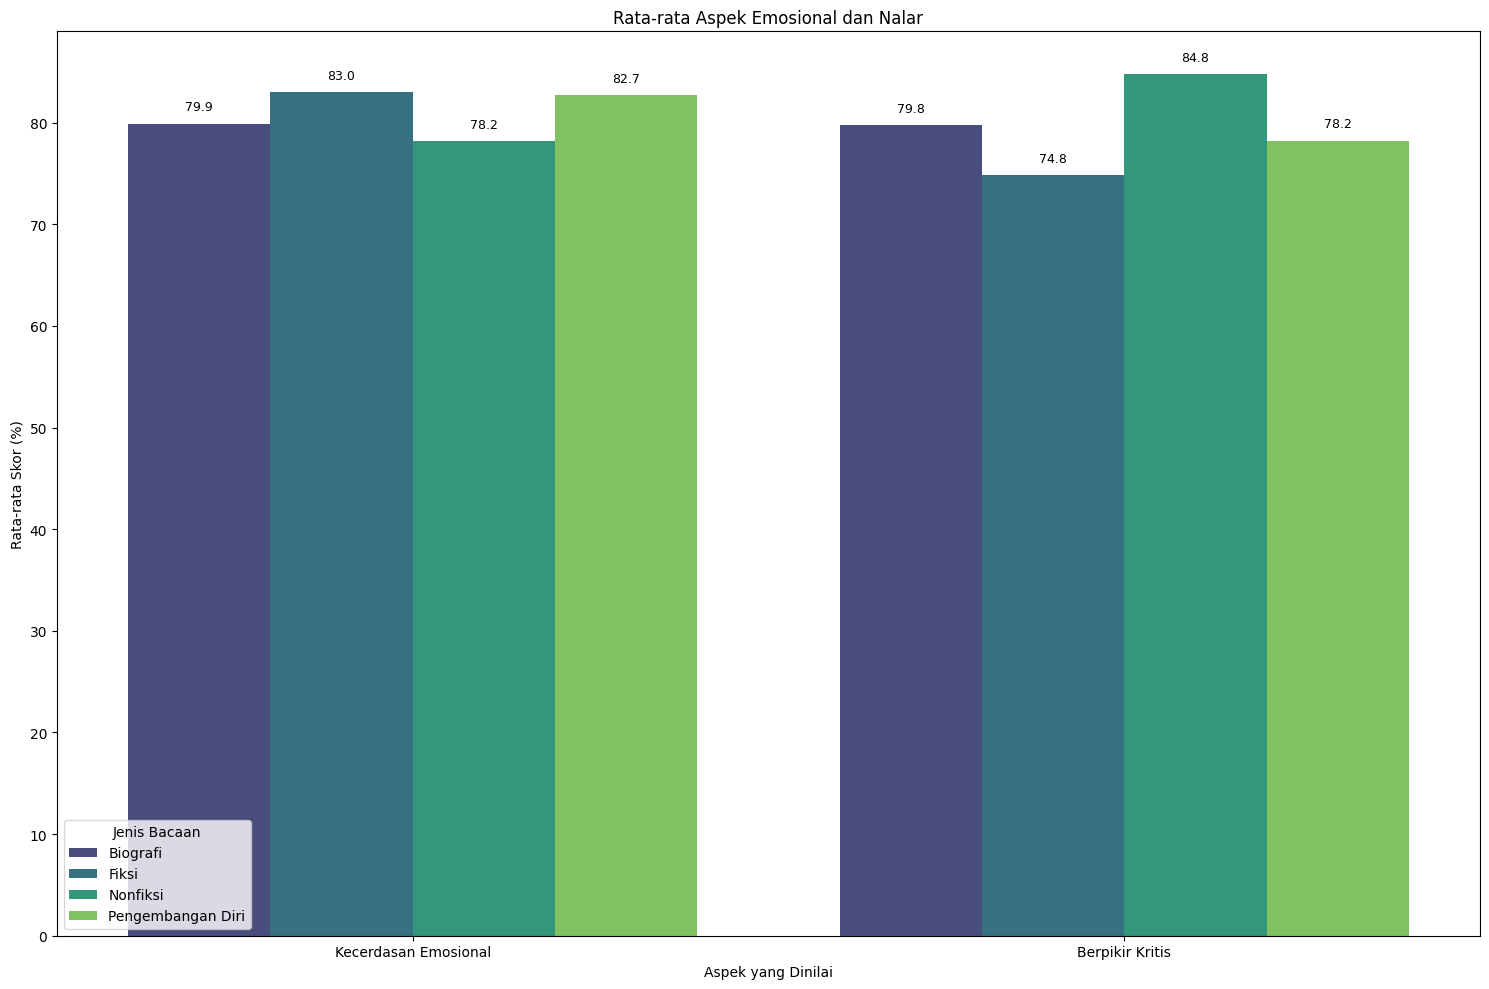

In [155]:
# Hitung rata-rata tiap merek dan variabel
group_means = df.groupby('Jenis Bacaan')[['Kecerdasan Emosional', 'Berpikir Kritis']].mean().reset_index()

# Ubah ke long format
df_melt = pd.melt(group_means, id_vars='Jenis Bacaan', var_name='Variabel', value_name='Rata-rata')

plt.figure(figsize=(15,10))

# Tukar posisi x dan hue
ax = sns.barplot(data=df_melt, x='Variabel', y='Rata-rata', hue='Jenis Bacaan', palette='viridis')

plt.title('Rata-rata Aspek Emosional dan Nalar')
plt.xlabel('Aspek yang Dinilai')
plt.ylabel('Rata-rata Skor (%)')

# Tambah nilai rata-rata di atas bar
for p in ax.patches:
    height = p.get_height()
    if height > 0.1:
      ax.text(
        p.get_x() + p.get_width() / 2,
        height + 1,
        f'{height:.1f}',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.legend(title='Jenis Bacaan') # Update legend title
plt.tight_layout()
plt.show()

### INTERPRETASI

*   Disini menunjukan bahwa rata-rata untuk kecerdasan emosional untuk pembaca jenis bacaan Fiski lebih tinggi, yaitu 83%.
*   Untuk peminat pembaca jenis bacaan Pengembangan diri menempati tempat ke-2, yaitu sebanyak 82.7% disusul oleh pembaca Biografi dan Nonfiksi dengan masing-masing adalah 79.9% dan 78.2%
*   Lalu untuk pengamatan Berpikir Kritis diposisi pertama ada pembaca Nonfiksi sebesar 84.8%. diposisi kedua adalah pembaca Biografi sebesar 79.8% kemudian diikuti oleh Pengembangan diri dan Fiksi di posisi terbawah dengan masing-masing presentase 78.2% dan 74.8%
*   Dapat disimpulkan bahwa jenis bacaan berpengaruh terhadap kecerdasan emosional dan berpikir kritis. Hasil ini sesuai dengan hasil uji MANOVA, yang menjukan pengaruh signifikan jenis bacaan yang dipilih oleh responden terhadap dua aspek emossi dan nalar.